$\def\com#1{\color{blue}{\textrm{#1}}}$
$\com{Marker's comments will appear like this}$

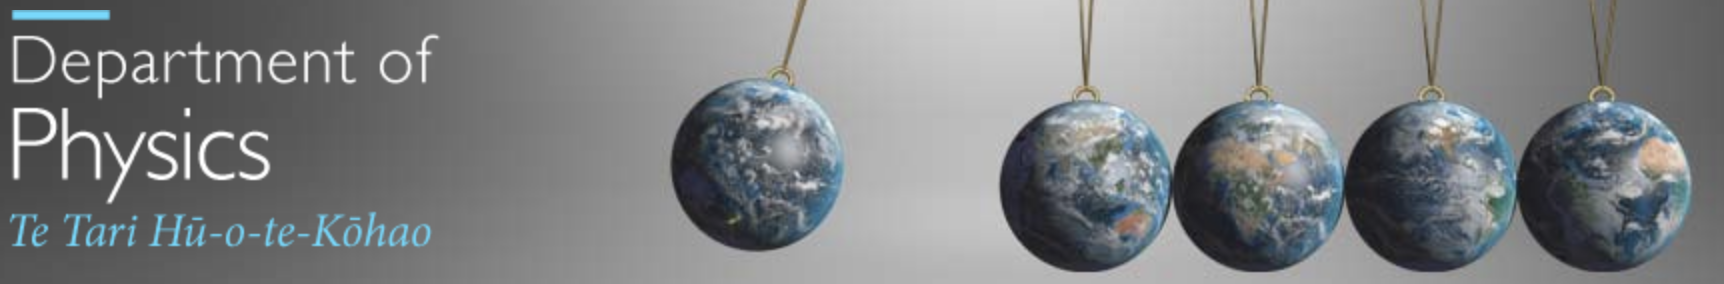
$$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}} 
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>

## Laboratory 2
In this lab you will explore the concepts of dimensionless reformulation. First, we will consider a common problem, root finding, and two methods of solution: graphical, and numerical.

# A. Vertical motion
A Ball is thrown vertically upwards against gravity with an initial velocity $v_0$. In this problem you will find the time $t$ at which the ball reaches a given height $h$. 
1. Choose some appropriate parameters $v_0$ and $h$ that ensure a solution exists. 
1. Express the equation for the curve crossing in the form $F(t)=0$, and plot $F(t)$ versus $t$ to get an idea for where the solutions (roots) lie. You should be able to get quite accurate solutions by enlarging regions of the plot. 
1. To find solutions numerically you will need to use the concept of **root finding**. Look it up, and use the package `Roots.jl` (you may need to install it) to find as many solutions for $t$ as you can, for a given choice of $v_0$ and $h$. Check that your solutions agree with the solutions you found above.
1. Explore the behavior of solutions with regard to the choice of starting point for the root finder, and with regard to bracketing.

**Notes:** 
1. You may use the equations in SI units for this part of the lab.
2. Your notebook should inlude a clear statement of the equations used, and a discussion that describes your findings. 

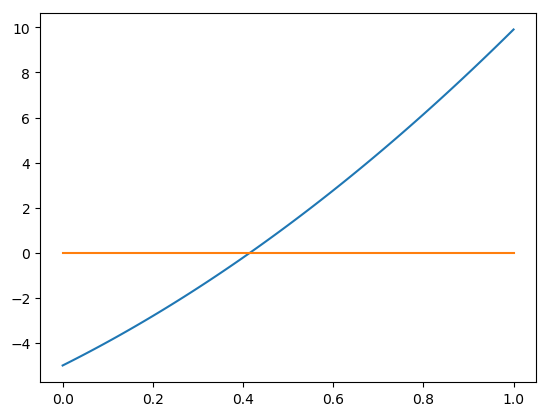

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4dbfd76310>

In [3]:
#Questions 1 and 2.....
using PyPlot
g = 9.81; vi = 10.0; h = 5;
f(t) = vi*t + 1/2*g*t^2 - h; 
y = [f(t) for t in 0:0.01:1];
plot(0:0.01:1,y)
plot(0:0.01:1,zeros(101))

#On the graph below i plotted a line intercepting the curve at y = 0.\
#This graphically shows the root to be at 0.4 ish.

In [4]:
#Question 3
using Roots;
g = 9.81; vi = 10.0; h = 5;
f(t) = vi*t + 1/2*g*t^2 - h; 
fzero(f,1)

0.41537208727843394

Running the code we actually see that this gives a similar answer to the one we ended up finding graphically, 0.4.

In [15]:
#Question 4
using Roots
using Formatting

g = 9.81; vi = 10.0; h = 5;
f(t) = vi*t + 1/2*g*t^2 - h; 

@time printfmt("value at 1 is {}\n",fzero(f,1));
@time printfmt("value at 0.5 is {}\n",fzero(f,0.5));
@time printfmt("value at 50 is {}\n",fzero(f,50));
@time printfmt("value at 12345 is {}\n",fzero(f, 12345));
@time printfmt("value bracketed between 0 and 1 is {}\n", fzero(f,0,1));
@time printfmt("value bracketed between 0 and 12345 is {}\n", fzero(f,0,12345));

value at 1 is 0.41537208727843394
  0.005142 seconds (972 allocations: 41.364 KiB)
value at 0.5 is 0.41537208727843394
  0.000057 seconds (237 allocations: 6.516 KiB)
value at 50 is 0.41537208727843394
  0.000068 seconds (407 allocations: 10.000 KiB)
value at 12345 is 0.41537208727843394
  0.000075 seconds (621 allocations: 15.391 KiB)
value bracketed between 0 and 1 is 0.41537208727843394
  0.000133 seconds (1.10 k allocations: 19.156 KiB)
value bracketed between 0 and 12345 is 0.41537208727843394
  0.000121 seconds (1.10 k allocations: 19.172 KiB)


So it looks like it gives the same answer with bracketing and initial guesses. The first call was the slowest as that is when fzero gets compiled, but aside from that it looks like using an initial guess close to the actually value is faster than using one far away, but using one far away is faster than using brackets, which are quite a bit slower.

$\com{$g$  $\rightarrow$ $-g$, right ? }$

# B. Blackbody radiation
For blackbody radiation, the radiant energy per unit volume in the wavelength range $\lambda$ to $\lambda+d\lambda$ is
$$ 
u(\lambda)d\lambda =\frac{8\pi}{\lambda^5}\frac{hc}{\exp{(hc/\lambda k_B T)}-1}d\lambda
$$
where $T$ is the temperature of the body, $c$ is the speed of light, $h$ is Plank's constant, and $k_B$ is Boltzmann's constant. 

1. Write this equation in an appropriate choice of dimensionless units, and plot the curve $\bar u(\bar\lambda)$ versus $\bar\lambda$.

1. Show concisely how you arrived at the dimensionless form of the equations. 

1. Derive the equation that allows you to determine the wavelength $\lambda_{\rm max}$ at which the maximum radiation energy density occurs. 

1. Show that $\lambda_{\rm max}$ may be written as 
$$\lambda_{\rm max}=\alpha\frac{hc}{k_B T}$$
where $\alpha$ is a constant. 

1. Determine the value of $\alpha$ numerically.

**Note:** The total radiant energy is found by integrating
$$\int_0^\infty u(\lambda)d\lambda=E$$ 

1. From looking it up I know that 

$$\lambda = m$$

$$c = \frac{m}{s}$$

$$h = Js$$

$$k_b = \frac{J}{K}$$

$$T = K$$

Now we define 
$$\lambda = \lambda_0 \lambda_C$$ Where lambda_C is our lambda bar.
Now $$\lambda_0 = \frac{hc}{K_b T}$$ 
Now lambda_C will be dimensionless. 
Rearranging we get

$$U(\lambda)d \lambda = \frac{8 \pi K_b^{5}T^{5}}{h^{4}c^{4}}\frac{1}{\lambda_C^{5}}\frac{1}{e^{\lambda_C} - 1}$$

 $\com{$\frac{1}{e^{\lambda_c}-1} \rightarrow \frac{1}{e^{1/\lambda_c}-1}$ ?}$

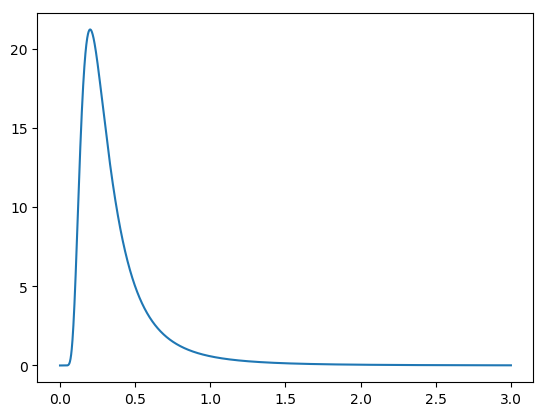

In [5]:
#We can just quickly plot the equation for λ_C to see what it looks like
using PyPlot

U(x) = (x^(-5.0))*(1/(e^(1/x) - 1)); 
y = [U(x) for x in 0:0.001:3];
plot(0:0.001:3,y);
#Looks good...

3.

We will differentiate the function and set it to zero such that we can find the maximum. The maximum will the the root of its derivative. Using Wolfram Alpha we find the derivative to be (e^(1/x) (1 - 5 x) + 5 x)/((-1 + e^(1/x))^2 x^7).

4.
We know that lambda is equal to a lambda_o times an equation in terms of lambda_C. We know that the max of lambda_C will be some constant, call it alpha. We also know that 

$$\lambda_o = \frac{hc}{k_B T}$$

Therefore

$$\lambda_{max} = \lambda_{C(max)} \lambda_o = \alpha \frac{hc}{k_B T}$$

So it is shown.

5.
To find alpha, we get the derivative of lambda_C and set this to 0 and use the roots package to find a root. This will be the maxima.

In [27]:
using Roots ;
f(x) = (e^(1/x)*(1-5x) + 5x)/(x^7*(-1 + e^(1/x))^2);
fzero(f,0.1,1)

0.2014052352726422

This is the maximum of lambda_C, i.e alpha.

$\com{6/10, can do better !}$